In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 14})
result_data = {}
q_rate = 40

In [3]:
def get_integral_spec(spec, energy):
    bins = np.diff(energy) * spec[:-1]
    integral_spec = np.cumsum(bins)
    return integral_spec
    

In [4]:
def q_energy(energy, dN_dE):
    global q_rate
    bins = np.arange(0, max(energy) + q_rate, q_rate)
    digitized = np.digitize(energy, bins)
    
    res_energy = []
    res_dN_dE = []
    
    for i in range(1, len(bins)):
        mask = (digitized == i)
        if np.any(mask):
            res_energy.append(bins[i] - q_rate / 2)  # mean energy
            res_dN_dE.append(np.mean(dN_dE[mask]))  # mean dn/de

    return res_energy, res_dN_dE


In [5]:
def get_q_data(file_path, NUM_OF_ISOTOPES = 1):
    data = pd.read_csv(file_path, sep='\s+', header=None, names=['Energy', 'dN/dE', 'Uncertainty'])
    
    global q_rate
    quantized_energy, quantized_dN_dE = q_energy(data['Energy'], data['dN/dE'] * NUM_OF_ISOTOPES)
    
    quantized_data = pd.DataFrame({
        'Energy': quantized_energy,
        'dN/dE': quantized_dN_dE
    })
    
    # if u wanna save and plot=)
    
    ## plt.figure(figsize=(15, 6))
    ## plt.errorbar(quantized_data['Energy'], quantized_data['dN/dE'], ecolor='r')
    ## plt.xlabel('Energy (keV)')
    ## plt.ylabel('dN/dE')
    ## plt.title('Energy Spectrum')
    ## plt.grid(True)
    ## plt.savefig("savedplots/16N.png")
    ## plt.show()
    return quantized_data

In [6]:
result_data['16N'] = get_q_data('isotopes/16N.txt', 2)

In [7]:
result_data['15C'] = get_q_data('isotopes/15C.txt')

In [8]:
result_data['12B'] = get_q_data('isotopes/12B.txt', 13)

In [9]:
result_data['13B'] = get_q_data('isotopes/13B.txt', 2)

In [10]:
result_data['11Be'] = get_q_data('isotopes/11Be.txt')

In [11]:
result_data['8B'] = get_q_data('isotopes/8B.txt', 6)

In [12]:
result_data['8Li'] = get_q_data('isotopes/8Li.txt', 14)

In [13]:
result_data['9C'] = get_q_data('isotopes/9C.txt', 2)

In [14]:
target_len = 16000 // q_rate # 16000 max

for isotope in result_data:
    df = result_data[isotope]
    curr_energy = df["Energy"].iloc[-1]
    new_rows = []
    
    for i in range(len(df), target_len):
        curr_energy += q_rate
        new_row = pd.Series([curr_energy, 0], index=df.columns)
        new_rows.append(new_row)
    
    
    new_df = pd.DataFrame(new_rows)
    
    
    df = pd.concat([df, new_df])
    result_data[isotope] = df
    

In [15]:
plt.figure(figsize=(10, 9))

<Figure size 1000x900 with 0 Axes>

<Figure size 1000x900 with 0 Axes>

In [16]:
energy = result_data['16N']["Energy"]
y = [result_data[isotope]['dN/dE'].values for isotope in result_data]

In [17]:
y = np.sum(y, axis = 0)
y /= 97
print(y.shape, energy.shape)

(400,) (400,)


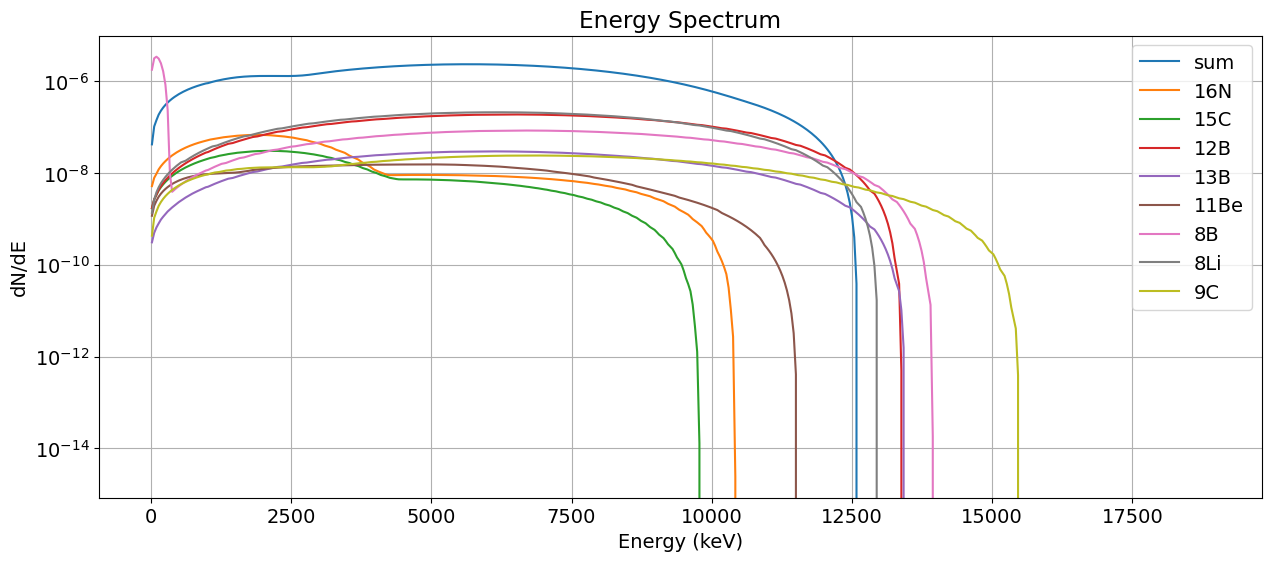

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(15, 6))
plt.title('Energy Spectrum')
plt.errorbar(energy, y, ecolor='r', label = 'sum')
for isotope in result_data:
    data = result_data[isotope]
    plt.errorbar(data['Energy'], data['dN/dE']/97, ecolor='r', label = isotope)
    
plt.xlabel('Energy (keV)')
plt.ylabel('dN/dE')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
    
plt.savefig("savedplots/fgshfh.png")

In [19]:
integral_y = get_integral_spec(y.copy(), energy)

In [20]:
criterion = 0
for elem in energy:
    criterion += 1
    if elem < 10000:
        continue
    else:
        break

sum_num = integral_y[-1] - integral_y[criterion]

In [21]:
sum_num

0.012327883838987863

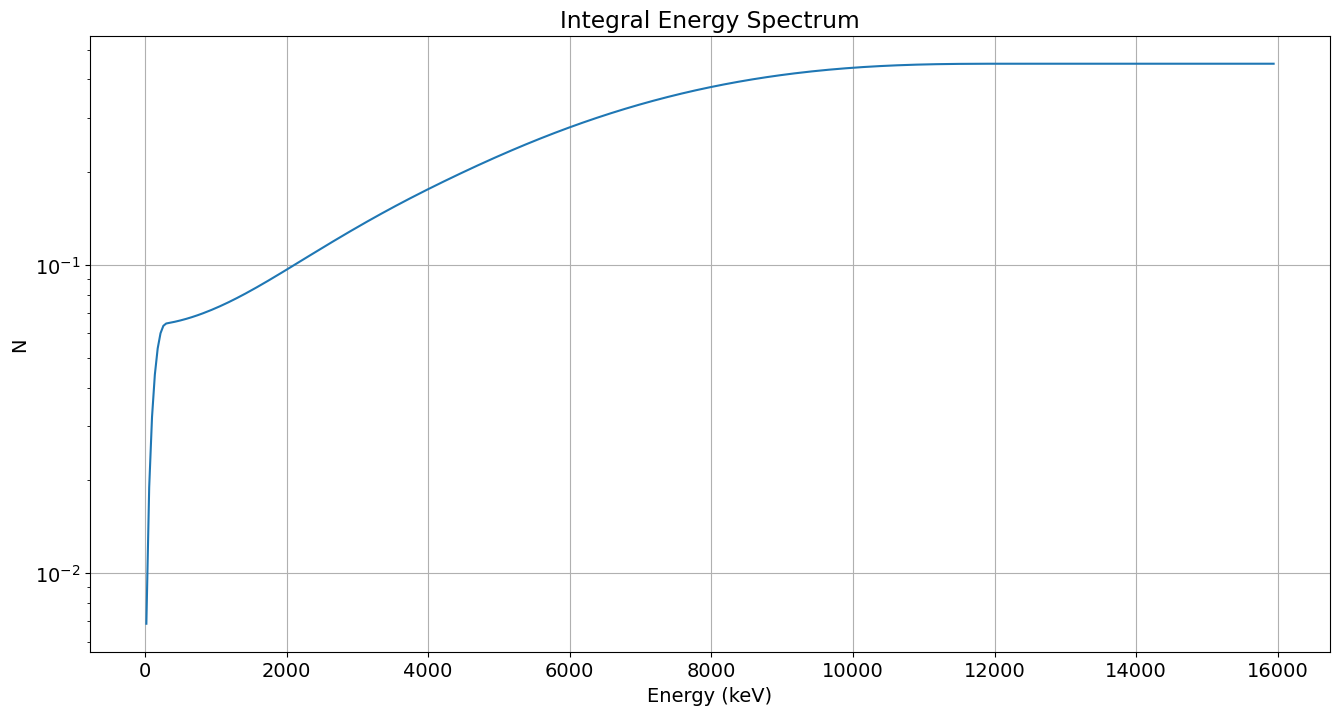

In [22]:
plt.figure(figsize=(16, 8))
plt.errorbar(energy[:-1], integral_y, ecolor='r', label="Integral Energy Spectrum")
plt.xlabel('Energy (keV)')
plt.ylabel('N')
plt.yscale('log')
# plt.xscale('log')
plt.title('Integral Energy Spectrum')

plt.grid(True)
plt.savefig("savedplots/integral_spec_fin.png")
plt.show()

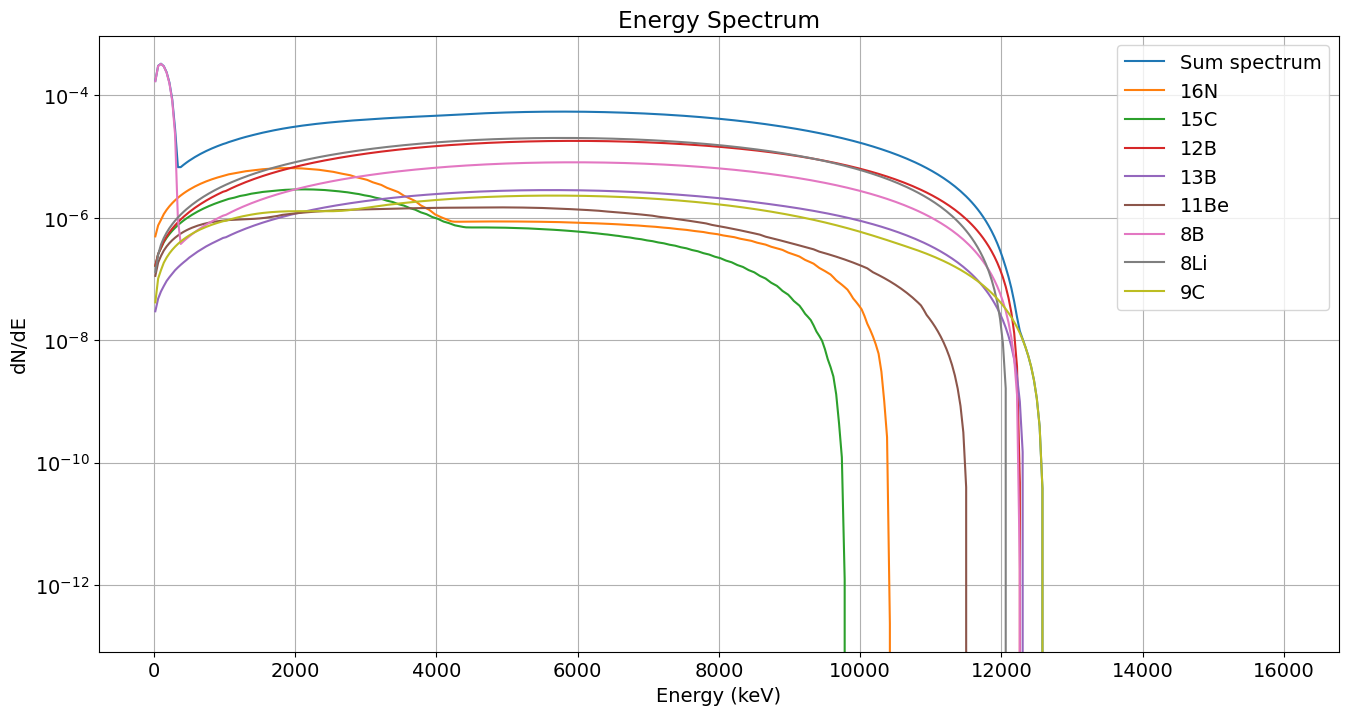

In [23]:
result_data['16N'] = get_q_data('isotopes/16N.txt', 2)
result_data['15C'] = get_q_data('isotopes/15C.txt')
result_data['12B'] = get_q_data('isotopes/12B.txt', 13)
result_data['13B'] = get_q_data('isotopes/13B.txt', 2)
result_data['11Be'] = get_q_data('isotopes/11Be.txt')
result_data['8B'] = get_q_data('isotopes/8B.txt', 6)
result_data['8Li'] = get_q_data('isotopes/8Li.txt', 14)
result_data['9C'] = get_q_data('isotopes/9C.txt', 2)
target_len = 16000 // q_rate # 16000 max


plt.figure(figsize=(16, 8))
plt.errorbar(energy, y, ecolor='r', label="Sum spectrum")
for isotope in result_data:
    df = result_data[isotope]
    curr_energy = df["Energy"].iloc[-1]
    new_rows = []
    
    for i in range(len(df), target_len):
        curr_energy += q_rate
        new_row = pd.Series([curr_energy, 0], index=df.columns)
        new_rows.append(new_row)
    
    
    new_df = pd.DataFrame(new_rows)
    
    
    df = pd.concat([df, new_df])
    result_data[isotope] = df


for isotope in result_data:
    energy = result_data['16N']["Energy"]
    y = result_data[isotope]['dN/dE'].values
    y /= 97
    plt.errorbar(energy, y, ecolor='r', label=isotope)


plt.xlabel('Energy (keV)')
plt.ylabel('dN/dE')
plt.yscale('log')
# plt.xscale('log')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.savefig("savedplots/finalresult.png")
plt.show()

In [24]:
muon_spectrum_zero = pd.read_csv('Energy_loglog_plot_resut_0.txt', sep='\s+', header=None, names=['Energy', 'N'])
muon_spectrum = pd.read_csv('Energy_loglog_plot_resut_1.2.txt', sep='\s+', header=None, names=['Energy', 'N'])

In [25]:
muon_spectrum_zero['N'] = [10**(elem) for elem in muon_spectrum_zero['N']]
muon_spectrum["N"] = [10**(elem) for elem in muon_spectrum['N']]

muon_spectrum_zero['Energy'] = [10**(elem) for elem in muon_spectrum_zero['Energy']]
muon_spectrum["Energy"] = [10**(elem) for elem in muon_spectrum['Energy']]

In [26]:
muon_spectrum.head()

,Energy,N
0,1.000000,0.003983
1,1.018591,0.003982
2,1.037528,0.003982
3,1.056818,0.003981
4,1.076465,0.003981


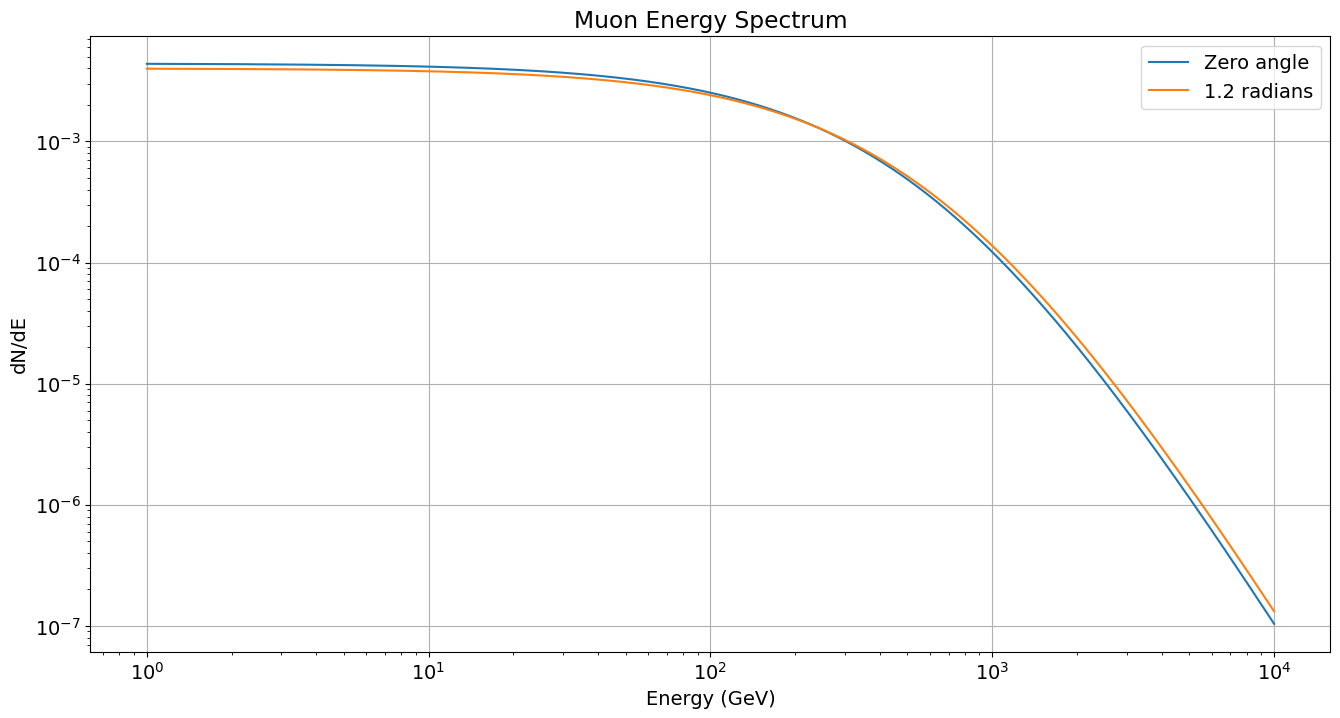

In [27]:
plt.figure(figsize=(16, 8))
plt.errorbar(muon_spectrum_zero['Energy'], muon_spectrum_zero['N'], label = 'Zero angle')
plt.errorbar(muon_spectrum['Energy'], muon_spectrum['N'], label = '1.2 radians')
plt.xlabel('Energy (GeV)')
plt.ylabel('dN/dE')
plt.yscale('log')
plt.xscale('log')
plt.title('Muon Energy Spectrum')
plt.grid(True)
plt.legend()

plt.savefig("savedplots/muon_diff_spec.png")
plt.show()

In [28]:
muon_spectrum_zero['N'] = get_integral_spec(muon_spectrum_zero['N'], muon_spectrum_zero['Energy'])
muon_spectrum['N'] = get_integral_spec(muon_spectrum['N'], muon_spectrum["Energy"])

In [29]:
muon_spectrum.iloc[-1]

Energy    10000.0
N             NaN
Name: 500, dtype: float64

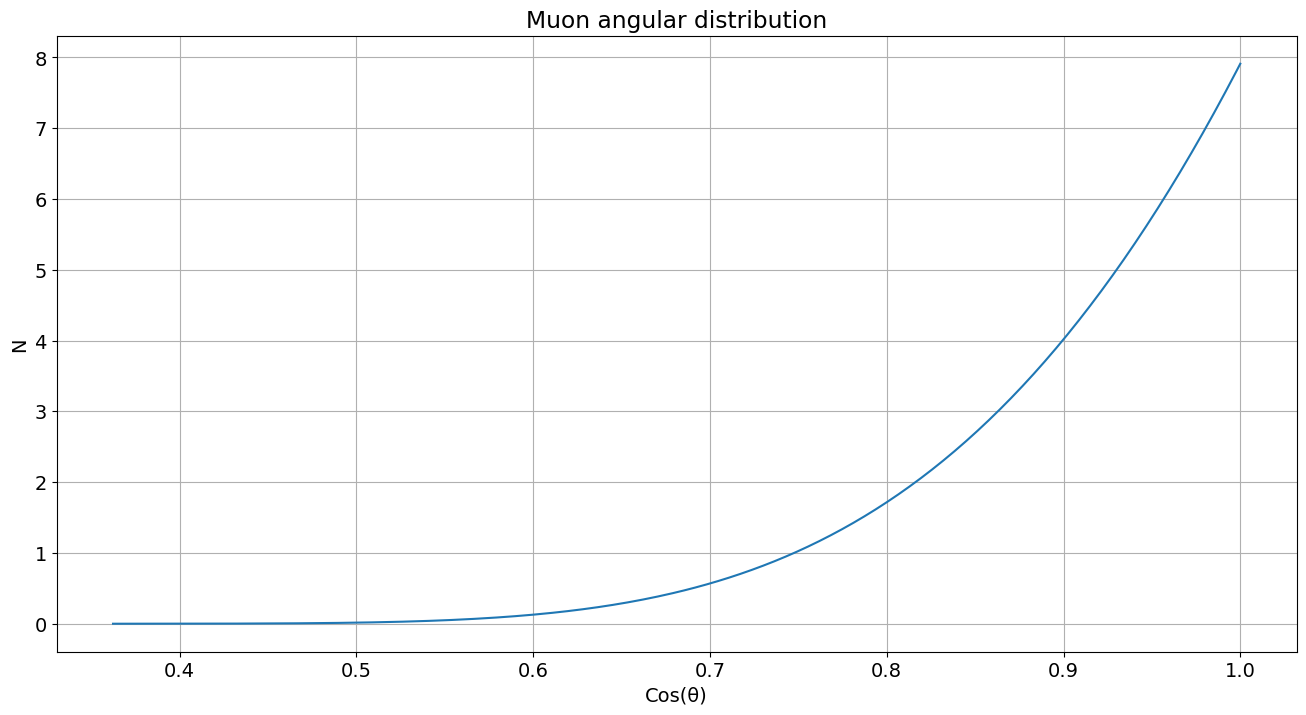

In [30]:
muon_spectrum = pd.read_csv('Theta_muon_distribution_plot.txt', sep='\s+', header=None, names=['Energy', 'N'])
plt.figure(figsize=(16, 8))
plt.errorbar(muon_spectrum['Energy'], muon_spectrum['N'])
plt.xlabel('Cos(θ)')
plt.ylabel('N')
# plt.yscale('log')
# plt.xscale('log')
plt.title('Muon angular distribution')
plt.grid(True)


plt.savefig("savedplots/theta_dist.png")
plt.show()